## Import Libraries

In [87]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the default style for seaborn plots
sns.set()

In [3]:
# Import the necessary libraries
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Change directory to the required folder
cd '/content/drive/My Drive/Colab Notebooks/with_kapil/kapil_git/CarAccident/'

/content/drive/My Drive/Colab Notebooks/with_kapil/kapil_git/CarAccident


In [5]:
# Read csv data for road accidents
df = pd.read_csv('road_accidents_czechia_2016_2022.csv')

In [6]:
# Select important columns from main
main = ['id','communication_kind','date','time','accident_kind','crash_kind',
        'fixed_precaution_kind','cause_of_accident','main_cause_of_accident']

consequences = ['id','injury','killed_persons','severely_injured_persons','slightly_injured_persons','total_material_damage',
                'vehicle_sequel','damage_to_the_vehicle(in_hundred_crowns)','leakage_of_transported_materials','way_of_releasing_persons_from_the_vehicle']

place = ['id','city','street','road_type','location','directional_rates']

driver_characteristic = ['id','alcohol','driver_category','driver_condition','driver_external_influence']

car_characteristic = ['id','vehicle_type','vehicle_brand','year_of_manufacture','vehicle_owner']


weather_and_road_condition = ['id','weather_conditions_at_the_time_of_accident','visibility','condition_of_vehicle_surface',
                              'condition_of_communication','road_surface_type','traffic_control_at_the_time_of_an_accident']


In [7]:
df.dtypes

id                                                               float64
communication_kind                                                object
date                                                              object
time                                                             float64
accident_kind                                                     object
crash_kind                                                        object
fixed_precaution_kind                                             object
injury                                                           float64
cause_of_accident                                                 object
alcohol                                                           object
main_cause_of_accident                                            object
killed_persons                                                   float64
severely_injured_persons                                         float64
slightly_injured_persons                           

In [8]:
df.head(3)

,id,communication_kind,date,time,accident_kind,crash_kind,fixed_precaution_kind,injury,cause_of_accident,alcohol,...,way_of_releasing_persons_from_the_vehicle,direction_of_movement,damage_to_the_vehicle(in_hundred_crowns),driver_category,driver_condition,driver_external_influence,city,street,road_type,location
0,6.004418e+10,Highways,2018-01-01,1625.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,800.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
1,6.004418e+10,Highways,2018-02-02,850.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,600.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
2,6.004418e+10,Highways,2018-03-01,1959.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,300.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village


In [9]:
df['date'] = pd.to_datetime(df['date'])

# General Information

In [10]:
cons = df[consequences].copy()
cons['date'] = df['date'].dt.year

<Axes: xlabel='date'>

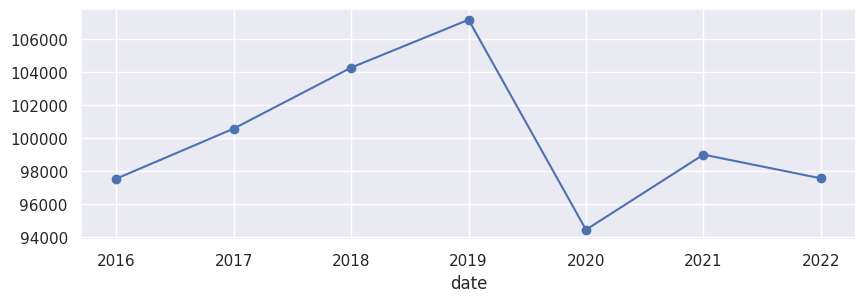

In [11]:
cons.groupby('date')['id'].count().plot(figsize=(10,3),marker='o')

In [12]:
grouped = cons.groupby('date')[['killed_persons','severely_injured_persons','slightly_injured_persons']].sum()

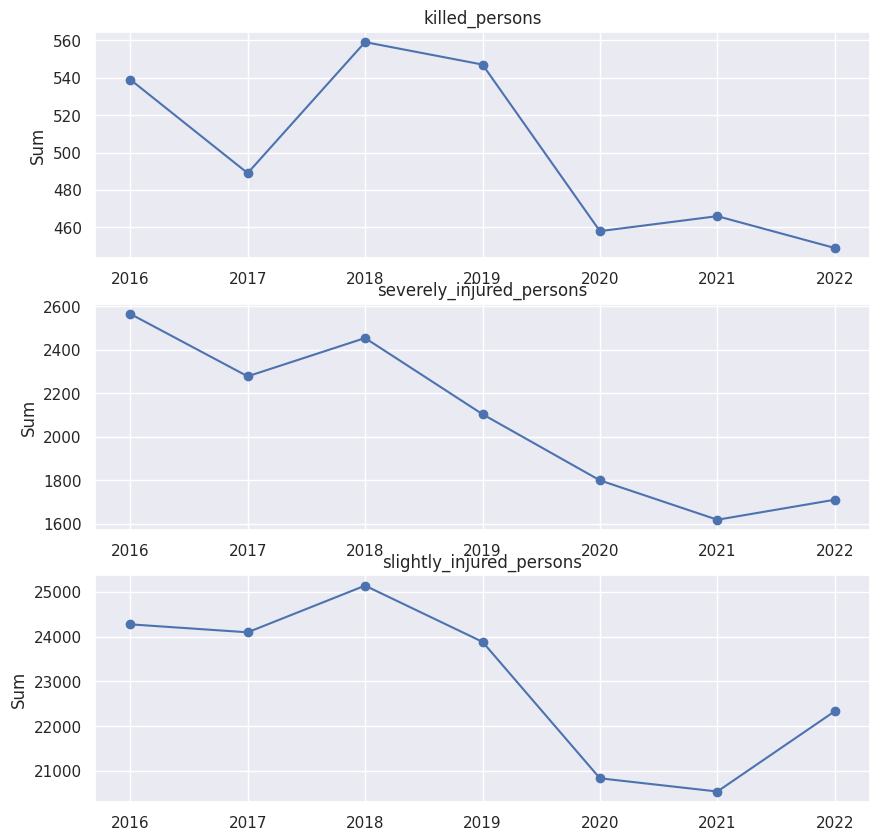

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for i,col in enumerate(grouped.columns):
  axes[i].plot(grouped.index, grouped[col], label=col, marker='o')
  axes[i].set_title(col)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Sum')

# Data Analysis

In [14]:
main = df[main].copy()

### Main reason of accident

In [15]:
main['main_cause_of_accident'].value_counts().head(7)

the driver was not fully engaged in driving the vehicle                                117775
not caused by the driver                                                               108355
incorrect turning or reversing                                                          60030
another kind of wrong way of driving                                                    57077
failure to keep a safe distance behind the vehicle                                      47726
Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)     42020
failure to control the vehicle                                                          39123
Name: main_cause_of_accident, dtype: int64

<Axes: >

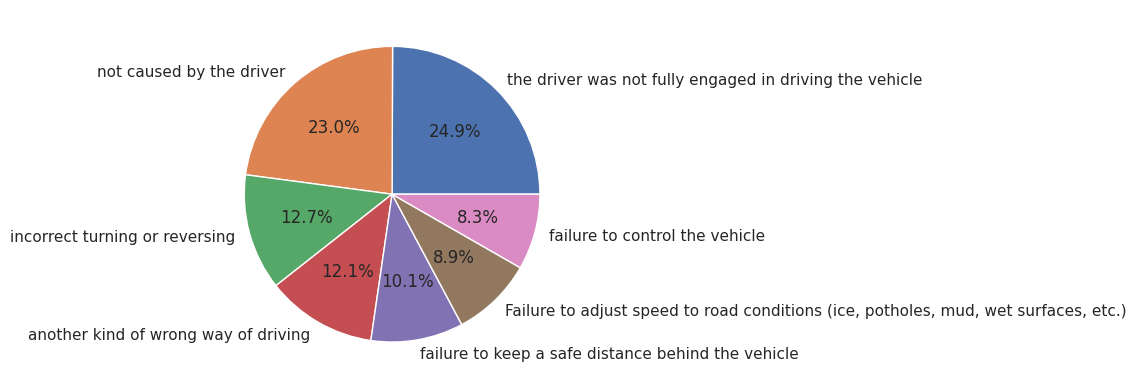

In [16]:
main['main_cause_of_accident'].value_counts(normalize=True).head(7).plot(kind='pie',ylabel='',autopct='%1.1f%%')

### Type of accident

In [17]:
main['accident_kind'].value_counts()

collision with a moving non-rail vehicle    224165
collision with a vehicle parked, parked     153275
collision with a fixed obstacle             147434
collision with forest animals                92632
crashes                                      37128
collision with a pedestrian                  21239
another type of accident                     16832
collision with a tram                         3849
collision with a domestic animal              3144
collision with a train                         991
Name: accident_kind, dtype: int64

<Axes: >

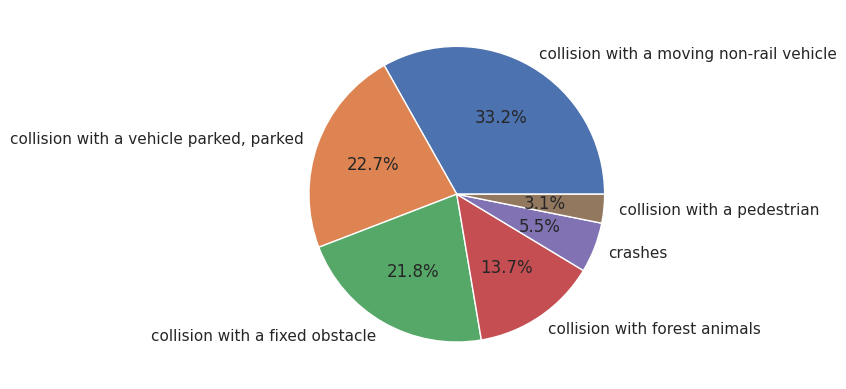

In [18]:
main['accident_kind'].value_counts(normalize=True).head(6).plot(kind='pie',ylabel='',autopct='%1.1f%%')

### Type of Obstacle

In [19]:
main['fixed_precaution_kind'].value_counts(normalize=True).head()

not an option not a collision with a fixed obstacle                   0.789587
other obstacle (railing, fence, embankment, boarding island, etc.)    0.061465
reflector, bollard, directional post, traffic sign post, etc.         0.038860
telephone, lighting, power lines, signalling, etc.                    0.028104
lever                                                                 0.026876
Name: fixed_precaution_kind, dtype: float64

<Axes: >

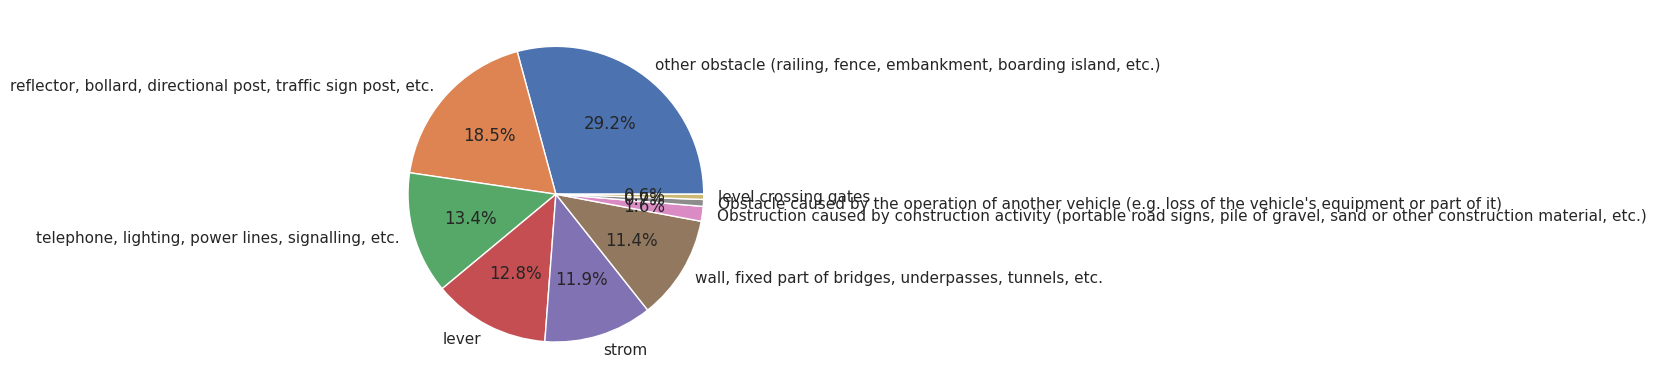

In [20]:
exclude = main['fixed_precaution_kind'].value_counts().head(1).reset_index()
main[~main['fixed_precaution_kind'].isin(exclude['index'])]['fixed_precaution_kind'].value_counts(normalize=True).plot(kind='pie',ylabel='',autopct='%1.1f%%')

# Who?

In [21]:
who = df[driver_characteristic+car_characteristic].copy()
who.isna().mean()

id                           0.008964
alcohol                      0.009595
driver_category              0.009626
driver_condition             0.048376
driver_external_influence    0.038225
id                           0.008964
vehicle_type                 0.011005
vehicle_brand                0.045848
year_of_manufacture          0.008964
vehicle_owner                0.014485
dtype: float64

In [22]:
who['driver_category'].value_counts(normalize=True,dropna=False)

with a driving licence of category B                                            0.521576
with a driving licence of category C                                            0.177623
undetected, driver drove off                                                    0.173507
with a driving licence of category D                                            0.041509
other vehicle drivers (e.g. cyclists, car drivers, train drivers, etc.)         0.030856
not detected, the driver left the scene (code 17 for p44 or code 4 for p50a)    0.028572
without a driving licence                                                       0.010732
NaN                                                                             0.009626
not detected (e.g. for foreigners)                                              0.003032
with a driving licence of category A                                            0.002255
with a driving licence of group T                                               0.000412
with a driving licenc

In [23]:
who['vehicle_owner'].value_counts(normalize=True,dropna=False)

private not used for profitable activities                         0.513730
private organization (entrepreneur, s.r.o., v.o.s., a.s., etc.)    0.214856
undetected, driver drove off                                       0.173507
registered outside the Czech Republic                              0.036156
privately used for gainful employment                              0.016847
NaN                                                                0.014485
public transport                                                   0.010034
Police of the Czech Republic                                       0.009621
state enterprise, state organisation                               0.003341
TAXI                                                               0.002280
Ministry of the Interior                                           0.001669
municipal, municipal police                                        0.000917
international truck transport                                      0.000692
Other       

In [24]:
who['vehicle_type'].value_counts(normalize=True,dropna=False)

passenger car without trailer                                                 0.616841
undetected, driver drove off                                                  0.173507
truck (including multi-car, crane, tanker, etc.)                              0.083085
truck with trailer                                                            0.040103
bicycle                                                                       0.027227
motorcycle (including sidecars, scooters, etc.)                               0.018405
bus                                                                           0.014469
NaN                                                                           0.011005
passenger car with trailer                                                    0.005713
tractor (with trailer)                                                        0.003328
other motor vehicle (agricultural, forestry, construction machinery, etc.)    0.002341
Tram                                       

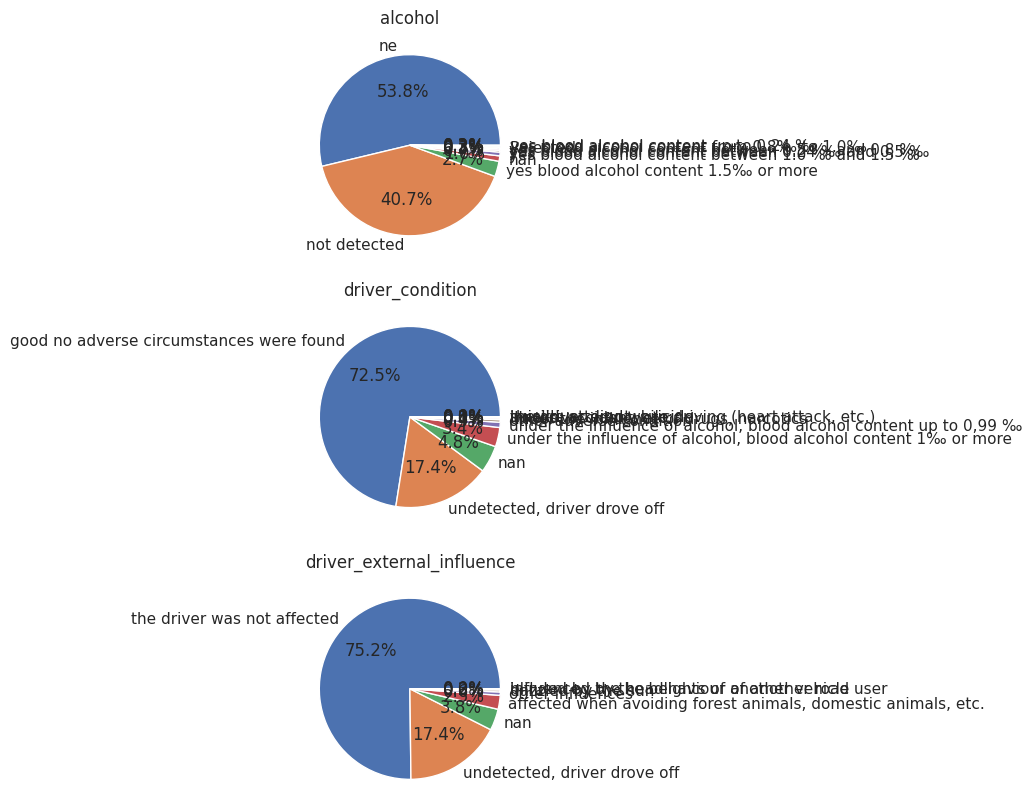

In [25]:
vliv = ['alcohol','driver_condition','driver_external_influence']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 10))

for i,col in enumerate(vliv):
  t = who[col].value_counts(normalize=True,dropna=False)
  axes[i].pie(t,labels=t.index, autopct='%1.1f%%')
  axes[i].set_title(col)
plt.show()


Looks like nothing affects the driver, only in rare cases. It can be considered as outliers.

In [26]:
def year(row):
  if row in range(2010,2021):
    return '2010-2020'
  elif row in range(2000,2011):
    return '2000-2010'
  elif row in range(1990,2001):
    return '1990-2000'
  elif row == -1:
    return np.nan
  else:
    return '<1990'

In [27]:
who['year_of_manufacture'].apply(year).value_counts(normalize=True,dropna=False)

2010-2020    0.394896
2000-2010    0.272743
NaN          0.216492
1990-2000    0.061480
<1990        0.054388
Name: year_of_manufacture, dtype: float64

In [28]:
who['vehicle_brand'] = who['vehicle_brand'].str.title()
df['vehicle_brand'] = who['vehicle_brand']

In [29]:
who['vehicle_brand'].value_counts(normalize=True,dropna=False).head(10)

Škoda                           0.205559
Undetected, Driver Drove Off    0.173507
Volkswagen                      0.077621
Ford                            0.052451
NaN                             0.045848
Renault                         0.039281
Mercedes                        0.037829
Peugeot                         0.036711
Bmw Motorcycles                 0.024858
Hyundai                         0.024100
Name: vehicle_brand, dtype: float64

# Where?

In [30]:
where = df[place].copy()
where.isna().mean()

id                   0.008964
city                 0.000000
street               0.446960
road_type            0.008964
location             0.008964
directional_rates    0.008964
dtype: float64

In [31]:
where.loc[where['city'].notna(),'city'] = where['city'].str.title()
where.loc[where['street'].notna(),'street'] = where['street'].str.title()

## City

In [32]:
where['city'].value_counts(normalize=True).head()

Outside The Municipality    0.324849
Brno                        0.023894
Olomouc                     0.009553
Liberec                     0.008976
Hradeckrálové               0.008472
Name: city, dtype: float64

In [33]:
def praha(row):
  if type(row) != float and 'Praha' in row:
    return 'Praha'
  return row
top_city = where['city'].apply(praha).value_counts(normalize=True,dropna=False)

In [34]:
top_city.head(10)

Outside The Municipality    0.324849
Praha                       0.195154
Brno                        0.023894
Olomouc                     0.009553
Liberec                     0.008976
Hradeckrálové               0.008472
Českébudějovice             0.006588
Pardubice                   0.006478
Teplice                     0.005997
Zlín                        0.005699
Name: city, dtype: float64

## street

In [35]:
where[['city','street']].value_counts(normalize=True,dropna=False).head(6)

city                      street      
Outside The Municipality  NaN             0.324750
Praha                     NaN             0.001235
Praha5                    Pražskýokruh    0.000873
Praha9Vysočany            Kbelská         0.000873
Praha6Břevnov             Bělohorská      0.000868
Poruba                    Opavská         0.000734
dtype: float64

Certainly, we cannot draw any specific conclusions due to more than a third of the values being unknown. However, Opavska Street in the city of Poruba stands out from the rest.

In [37]:
df['main_cause_of_accident'].value_counts(normalize=True).head()

the driver was not fully engaged in driving the vehicle    0.168085
not caused by the driver                                   0.154641
incorrect turning or reversing                             0.085673
another kind of wrong way of driving                       0.081458
failure to keep a safe distance behind the vehicle         0.068113
Name: main_cause_of_accident, dtype: float64

In [38]:
df[(df['city'] == "Poruba") & (df['street'] == "Opavská")][['crash_kind','main_cause_of_accident']].value_counts(normalize=True,dropna=True).head()

crash_kind                                                   main_cause_of_accident                                 
strabismus                                                   failure to keep a safe distance behind the vehicle         0.263969
not an option It is not a collision between moving vehicles  another kind of wrong way of driving                       0.090559
                                                             not caused by the driver                                   0.069364
                                                             incorrect turning or reversing                             0.061657
                                                             the driver was not fully engaged in driving the vehicle    0.055877
dtype: float64

Drivers are constantly colliding because of the lack of distance between them

In [39]:
df[(df['city'] == "Českálípa") & (df['street'].isna())]\
 [['crash_kind','main_cause_of_accident']]\
 .value_counts(normalize=True,dropna=True).head()

crash_kind                                                   main_cause_of_accident                                                             
not an option It is not a collision between moving vehicles  failure to control the vehicle                                                         0.489279
                                                             the driver was not fully engaged in driving the vehicle                                0.146199
                                                             not caused by the driver                                                               0.052632
strabismus                                                   the driver was not fully engaged in driving the vehicle                                0.031189
not an option It is not a collision between moving vehicles  Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)    0.031189
dtype: float64

## Type of road

<Axes: >

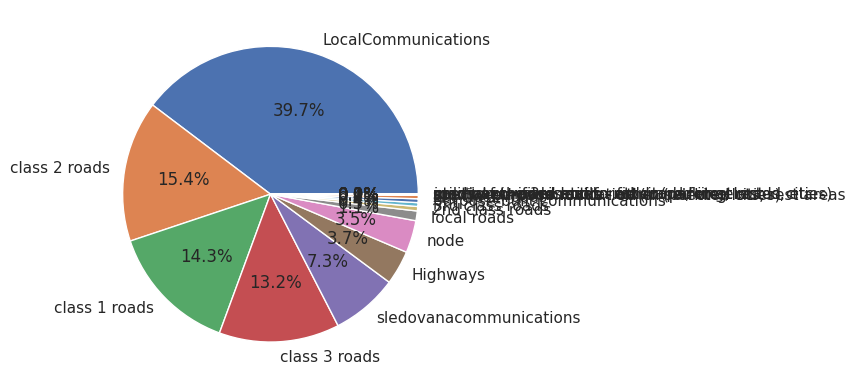

In [40]:
where['road_type'].value_counts(normalize=True).plot(kind='pie',ylabel='',autopct='%1.1f%%')

In [41]:
where[where['city'].isna()]['road_type'].value_counts()

Series([], Name: road_type, dtype: int64)

In [42]:
where[where['city'].isna()]['location'].value_counts(normalize=True)

Series([], Name: location, dtype: float64)

52.5 percent of the city's unknown values are accidents outside the city limits

In [43]:
where['city'] = where['city'].fillna('outside the municipality')
df['city'] = where['city']

In [44]:
df['city'].isna().mean()

0.0

In [45]:
where[where['street'].isna()]['location'].value_counts(normalize=True)

outside the village    0.738022
in the village         0.261978
Name: location, dtype: float64

In [46]:
where.loc[(where['street'].isna()) & (where['location'] == 'outside the municipality'),'street'] = 'outside the municipality'
where[where['location'] == 'outside the municipality'].head()
df['street'] = where['street']

In [47]:
df['street'].isna().mean()

0.4469602999602561

# When?

<Axes: >

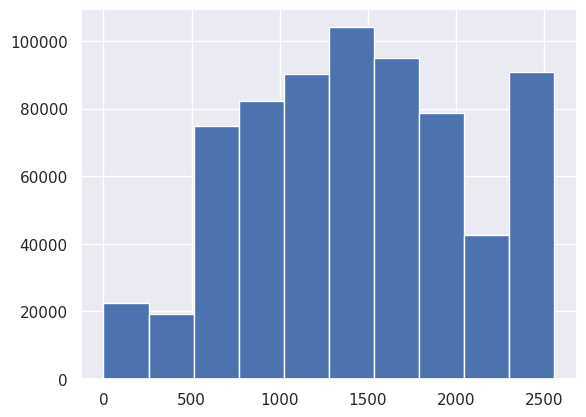

In [48]:
df['time'].hist()

<Axes: >

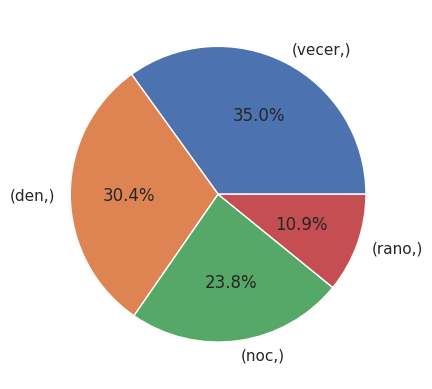

In [49]:
# There are values from 0 to 2560, so the only sure solution is to divide into 4 equal parts
pd.DataFrame(pd.cut(df['time'],4,labels=['rano','den','vecer','noc'])).value_counts(normalize=True).plot(kind='pie',ylabel='',autopct='%1.1f%%')

<Axes: xlabel='date'>

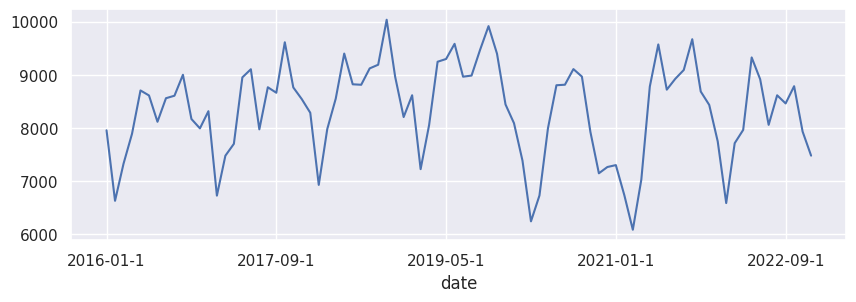

In [50]:
df.groupby(df['date'].dt.strftime('%Y-%m-1'))['id'].count().plot(figsize=(10,3))

<Axes: >

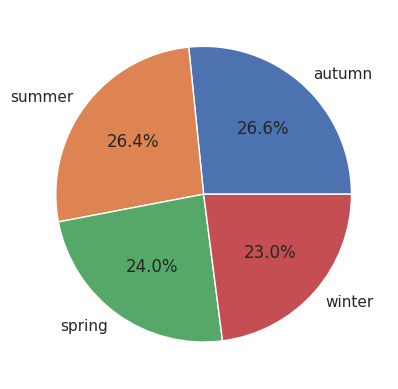

In [51]:
def obdobi(row):
  obdobi = {'winter':(12,1,2),'spring':(3,4,5),'summer':(6,7,8),'autumn':(9,10,11)}
  for i in obdobi.keys():
    if row.month in obdobi[i]:
      return i
df['date'].apply(obdobi).value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ylabel='')

<Axes: xlabel='date'>

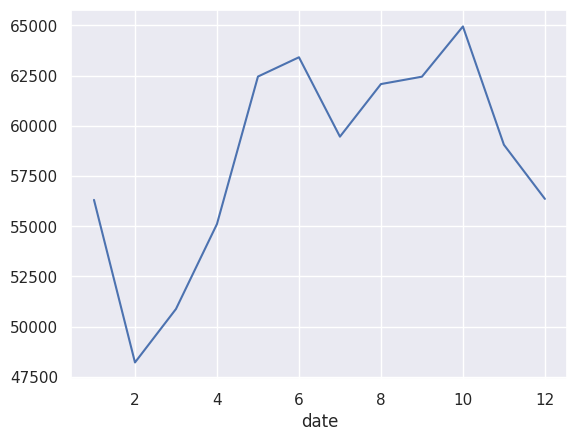

In [52]:
df.groupby(df['date'].dt.month)['id'].count().plot()

In [53]:
df[df['date'].dt.month.isin([6,7,8])]['main_cause_of_accident'].value_counts(normalize=True,dropna=False).head()

the driver was not fully engaged in driving the vehicle    0.179401
not caused by the driver                                   0.146054
incorrect turning or reversing                             0.086521
another kind of wrong way of driving                       0.079470
failure to keep a safe distance behind the vehicle         0.067763
Name: main_cause_of_accident, dtype: float64

In [54]:
df[df['date'].dt.month.isin([12,1,2])]['main_cause_of_accident'].value_counts(normalize=True,dropna=False).head()

the driver was not fully engaged in driving the vehicle                                0.154536
not caused by the driver                                                               0.140401
Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)    0.135292
incorrect turning or reversing                                                         0.083241
another kind of wrong way of driving                                                   0.080742
Name: main_cause_of_accident, dtype: float64

We can see that almost 14% of cases are caused by weather conditions, but because people travel less often in winter => weather has almost no influence.

# Weather impact


In [55]:
weather = df[weather_and_road_condition].copy()

In [56]:
weather.head(3)

,id,weather_conditions_at_the_time_of_accident,visibility,condition_of_vehicle_surface,condition_of_communication,road_surface_type,traffic_control_at_the_time_of_an_accident
0,6.004418e+10,unencumbered,"reduced visibility during the day (dawn, dusk)",surface dry and unpolluted,"good, without defects",beton,no traffic control method
1,6.004418e+10,unencumbered,Daytime visibility not impaired by weather con...,surface wet,"good, without defects",resins,no traffic control method
2,6.004418e+10,unencumbered,"at night without public lighting, visibility n...",surface dry and unpolluted,"good, without defects",beton,no traffic control method


In [57]:
weather['date'] = df['date']

In [58]:
weather['period'] = weather['date'].apply(obdobi)

<Axes: >

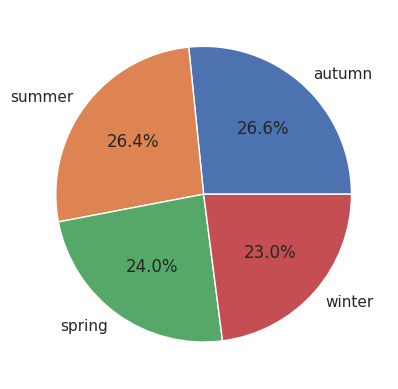

In [59]:
weather['period'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ylabel='')

In [60]:
weather.groupby('period')['weather_conditions_at_the_time_of_accident'].value_counts(normalize=True)

period  weather_conditions_at_the_time_of_accident         
autumn  unencumbered                                           0.870646
        Rain                                                   0.053912
        at the beginning of rain, light rain, drizzle, etc.    0.044268
        mlha                                                   0.018055
        snowfall                                               0.005750
        frost and ice form                                     0.003186
        other difficult                                        0.002532
        gusty winds (crosswind, gale, etc.)                    0.001652
spring  unencumbered                                           0.916198
        Rain                                                   0.039072
        at the beginning of rain, light rain, drizzle, etc.    0.028439
        snowfall                                               0.008621
        frost and ice form                                     0.002595
    

In [61]:
weather.groupby('period')['visibility'].value_counts(normalize=True)

period  visibility                                                                                          
autumn  Daytime visibility not impaired by weather conditions                                                   0.610425
        at night with public lighting, visibility not impaired by weather conditions                            0.137732
        at night without public lighting, visibility not impaired by weather conditions                         0.129767
        reduced visibility during the day (dawn, dusk)                                                          0.057060
        reduced visibility during the day due to weather conditions (fog, snow, rain, etc.)                     0.035648
        at night without public lighting, visibility impaired by weather conditions (fog, rain, snow, etc.)     0.016692
        at night with public lighting, impaired visibility due to weather conditions (fog, rain, snow, etc.)    0.012675
spring  Daytime visibility not impaired by w

It can be seen that the night and the weather conditions have had quite an impact on the accidents  
In the Czech Republic it is already dark after 16:00 in winter, which has a negative effect.

In [62]:
weather.groupby('period')['condition_of_vehicle_surface'].value_counts(normalize=True)

period  condition_of_vehicle_surface                                       
autumn  surface dry and unpolluted                                             0.752905
        surface wet                                                            0.228719
        surface dry and dirty (sand, dust, leaves, gravel, etc.)               0.005793
        there is ice on the road, snow on the road - not gritted               0.005342
        continuous snow layer, loose snow                                      0.002044
        there is ice on the road, snow on the road - gritted                   0.002028
        there's mud on the road                                                0.001373
        different condition of the road surface at the time of the accident    0.001067
        sudden change in road condition (icing on the bridge, local ice)       0.000408
        oil, diesel, etc. spilt on the road.                                   0.000322
spring  surface dry and unpolluted          

In [63]:
weather.groupby('period')['condition_of_communication'].value_counts(normalize=True)

period  condition_of_communication                               
autumn  good, without defects                                        0.973648
        other (unspecified) condition or defect of the road          0.013061
        incoherent potholes                                          0.004098
        longitudinal slope greater than 8 '%                         0.002017
        continuous potholes                                          0.001400
        temporary closure of one lane                                0.001159
        undulating surface in the longitudinal direction             0.001062
        transverse groove, bump, protruding, sunken rails            0.000858
        improperly placed, dirty, missing traffic sign               0.000826
        temporary road or lane closure                               0.000788
        an unmarked or insufficiently marked obstacle on the road    0.000762
        permanent narrowing of the roadway                           0.00032

# Pedestrains


In [65]:
df_pedestrian = pd.read_csv('pedestrian.csv')
df_pedestrian.head()

,Unnamed: 0,id,pedestrian_category,pedestrian_condition,pedestrian_behaviour,situation_at_the_point_of_accident
0,0,2100180003,Woman,under the influence of alcohol with a blood al...,sudden entry into the roadway from the sidewal...,another situation
1,1,2100180007,Woman,good no adverse circumstances were found,"correct, appropriate",crossing at a marked crossing
2,2,2100180039,man,under the influence of alcohol with a blood al...,sudden entry into the roadway from the sidewal...,another situation
3,3,2100180047,man,"inattention, distraction",sudden entry into the roadway from the sidewal...,another situation
4,4,2100180051,Woman,good no adverse circumstances were found,"correct, appropriate",crossing at a marked crossing


In [66]:
df_pedestrian['pedestrian_category'].value_counts(normalize=True)

Woman                     0.374591
man                       0.365308
child (up to 15 years)    0.189061
another group             0.065330
group of children         0.005709
Name: pedestrian_category, dtype: float64

In [67]:
df_pedestrian['pedestrian_condition'].value_counts(normalize=True)

good no adverse circumstances were found                                       0.661626
inattention, distraction                                                       0.119329
not detected                                                                   0.102637
under the influence of alcohol with a blood alcohol content of 1‰ or more      0.076618
under the influence of alcohol with a blood alcohol content of up to 0.99 ‰    0.022227
physical disability (illness, nausea, reduced mobility, etc.)                  0.005840
other condition not specified                                                  0.004838
invalid                                                                        0.003051
under the influence of drugs, narcotics                                        0.002266
suicide attempt, suicide                                                       0.001569
Name: pedestrian_condition, dtype: float64

In [68]:
df_pedestrian['pedestrian_behaviour'].value_counts(normalize=True)

correct, appropriate                                             0.611079
sudden entry into the roadway from the sidewalk, shoulder        0.207226
poor estimation of the distance and speed of the vehicle         0.063384
Side impact                                                      0.044014
confused, hasty, indecisive behaviour                            0.039315
sudden change in walking direction                               0.017334
sudden entry into the road from a boarding or dividing island    0.014567
children playing on the road                                     0.003080
Name: pedestrian_behaviour, dtype: float64

In [69]:
df_pedestrian['situation_at_the_point_of_accident'].value_counts(normalize=True)

crossing at a marked crossing                                               0.291785
another situation                                                           0.286816
Crossing outside the crossing (20 metres or more from the crossing)         0.176771
walking on the right side                                                   0.045108
pedestrian entry on the signal FREE                                         0.044628
walking, standing on the pavement                                           0.038440
crossing just in front of or behind a parked vehicle                        0.034604
walking on the wrong side                                                   0.025539
pedestrian entering on the STOP signal                                      0.025496
pedestrian entering the roadway near the crosswalk (approx. within 20 m)    0.015820
crossing just in front of or behind a vehicle at a bus stop                 0.014992
Name: situation_at_the_point_of_accident, dtype: float64

# Why people are get injured?

In [70]:
df['injury'].value_counts(normalize=True)

0.0    0.799357
1.0    0.200643
Name: injury, dtype: float64

In [71]:
train = df.dropna().drop(['slightly_injured_persons','severely_injured_persons','killed_persons','total_material_damage'],axis=1).sample(10000)
train['injury'].value_counts(normalize=True)

0.0    0.8466
1.0    0.1534
Name: injury, dtype: float64

In [72]:
from catboost import CatBoostClassifier, Pool

In [73]:
cat_features = df.select_dtypes(include=['category','object']).columns.to_list()
params = {
          "loss_function": "Logloss",
          "eval_metric": "PRAUC",
          "auto_class_weights":"Balanced",
          'random_seed': 42,
          "verbose": 200,
          "early_stopping_rounds":200,
          "cat_features":cat_features
         }

In [74]:
cb = CatBoostClassifier(**params)

In [75]:
train_data = Pool(data=train.drop('injury',axis=1),
                  label=train['injury'],
                  cat_features=cat_features)

In [76]:
cb.fit(train_data)

Learning rate set to 0.027538
0:	learn: 0.8722102	total: 624ms	remaining: 10m 23s
200:	learn: 0.9312555	total: 21.6s	remaining: 1m 25s
400:	learn: 0.9448207	total: 39.6s	remaining: 59.1s
600:	learn: 0.9546397	total: 59.4s	remaining: 39.4s
800:	learn: 0.9606028	total: 1m 16s	remaining: 19.1s
999:	learn: 0.9667343	total: 1m 34s	remaining: 0us


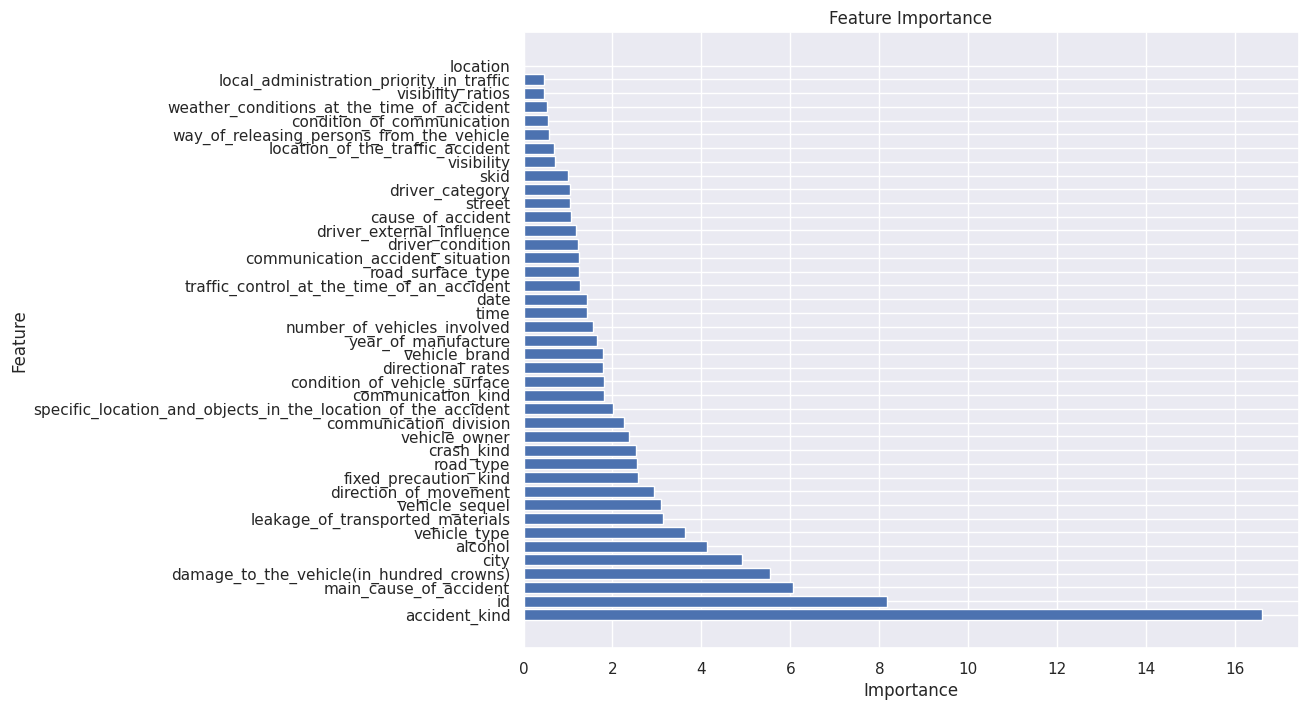

In [77]:
feature_importance = cb.get_feature_importance(prettified=True)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(feature_importance['Feature Id'], feature_importance['Importances'])
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')

plt.show()

In [78]:
df.groupby('accident_kind')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
accident_kind,,
collision with a moving non-rail vehicle,224165,0.286106
"collision with a vehicle parked, parked",153275,0.019501
collision with a fixed obstacle,147434,0.159631
collision with forest animals,92632,0.008377
crashes,37128,0.620314
collision with a pedestrian,21239,0.918311
another type of accident,16832,0.309292
collision with a tram,3849,0.170174
collision with a domestic animal,3144,0.103372


In [79]:
df.groupby('main_cause_of_accident')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
main_cause_of_accident,,
the driver was not fully engaged in driving the vehicle,117775,0.160059
not caused by the driver,108355,0.076978
incorrect turning or reversing,60030,0.047959
another kind of wrong way of driving,57077,0.066384
failure to keep a safe distance behind the vehicle,47726,0.206785
"Failure to adjust speed to road conditions (ice, potholes, mud, wet surfaces, etc.)",42020,0.301594
failure to control the vehicle,39123,0.273369
avoidance without sufficient lateral clearance (clearance),30029,0.040095
"Failure to adapt speed to the technical road conditions (curve, gradient, gradient, road width, etc.)",28509,0.477814


In [80]:
df.groupby('alcohol')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
alcohol,,
ne,380032,0.296107
not detected,287516,0.050689
yes blood alcohol content 1.5‰ or more,19422,0.412676
yes blood alcohol content between 1.0 ‰ and 1.5 ‰,4692,0.421355
yes blood alcohol content between 0.24 ‰ and 0.5 ‰,2107,0.363550
yes blood alcohol content between 0.5 ‰ and 0.8 ‰,1992,0.382530
Rejected,1847,0.380617
yes blood alcohol content from 0.8‰ to 1.0‰,1428,0.397759
yes blood alcohol content up to 0.24 ‰,1207,0.448219


In [81]:
df.groupby('crash_kind')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
crash_kind,,
not an option It is not a collision between moving vehicles,471684,0.159781
strabismus,76357,0.237005
Side,66650,0.215724
on the side,64025,0.307474
Front,21973,0.594411


In [82]:
df.groupby('city')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
city,,
Outside The Municipality,223339,0.246186
Brno,16894,0.270688
Olomouc,6754,0.185520
Liberec,6346,0.174283
Hradeckrálové,5990,0.172788
Praha4,5571,0.092264
Praha5,5289,0.092834
Praha9,5027,0.091307
Českébudějovice,4658,0.339416


In [83]:
df.groupby('year_of_manufacture')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
year_of_manufacture,,
-1.0,153066,0.161597
2016.0,33639,0.154315
2015.0,32264,0.157668
2017.0,30032,0.154469
2008.0,28443,0.215202
2011.0,26487,0.193491
2018.0,26207,0.157363
2007.0,25498,0.229665
2010.0,24966,0.199792


In [84]:
df.groupby('year_of_manufacture')['injury'].agg(['count','mean']).query('count > 100').sort_values('mean',ascending=False).head(10)

,count,mean
year_of_manufacture,,
1991.0,407,0.375921
1992.0,640,0.362500
1984.0,136,0.345588
1985.0,204,0.343137
1988.0,303,0.333333
1994.0,1246,0.327448
1986.0,228,0.324561
1995.0,2813,0.315677
1993.0,887,0.315671


In [85]:
df.groupby('driver_category')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
driver_category,,
with a driving licence of category B,368768,0.227365
with a driving licence of category C,125584,0.189045
"undetected, driver drove off",122674,0.033063
with a driving licence of category D,29348,0.196811
"other vehicle drivers (e.g. cyclists, car drivers, train drivers, etc.)",21816,0.829895
"not detected, the driver left the scene (code 17 for p44 or code 4 for p50a)",20201,0.046483
without a driving licence,7588,0.266869
not detected (e.g. for foreigners),2144,0.304104
with a driving licence of category A,1594,0.760979


In [86]:
df.groupby('road_type')['injury'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
road_type,,
LocalCommunications,278118,0.139168
class 2 roads,108180,0.298734
class 1 roads,99933,0.286902
class 3 roads,92252,0.271452
sledovanacommunications,51071,0.113215
Highways,26205,0.142530
node,24781,0.115290
local roads,7449,0.115854
2nd class roads,3397,0.279070
